# Case Study 1 : Collecting Data from Twitter

Due Date: September 22, **before the beginning of class at 6:00pm**

* ------------

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Shi He
    
    You Zhou
    
    Meng Wang
    
    Xiao-Qun Wang
    
    Zili Ma
    

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [3]:
import twitter
import json
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'OiGwDOtZ86hoBneUxNyOC2crT'
    CONSUMER_SECRET ='82qPfvK5ywR6Ijk0h7SdoDD6K4Jae9zzw8dnfwcxcJzH5pIZ1V'
    OAUTH_TOKEN = '120380513-Hl3wiO6dxID8s3Fw17JyzRMakBCZaji8fGHxkRWf'
    OAUTH_TOKEN_SECRET = 'dYZp2CUj7FtGZOuwZN7nNylFdIY86Fw4A77nMJDtlNg2P'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return auth

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# store the tokens
keys = [twitter.oauth.OAuth(consumer_key='OiGwDOtZ86hoBneUxNyOC2crT',
         consumer_secret='82qPfvK5ywR6Ijk0h7SdoDD6K4Jae9zzw8dnfwcxcJzH5pIZ1V',
         token='120380513-Hl3wiO6dxID8s3Fw17JyzRMakBCZaji8fGHxkRWf',
         token_secret='dYZp2CUj7FtGZOuwZN7nNylFdIY86Fw4A77nMJDtlNg2P'
        ),
        twitter.oauth.OAuth(consumer_key='D7Msdst1WuMPbkd9Dvnlt7ztH',
         consumer_secret='jnj5bYXPcNU6lpp1kEqF9zKOOuofGtHNyGX4O1wPqZvJKro3km',
         token='189581991-EeRWIAfCv8WfwDOwS6s79rrZEG0cpejekoytl1yq',
         token_secret='PXOi4Nb9e4H1graBnaMszp8fZ7SksQV8tRHUgh7ijePIK'
        ),
        twitter.oauth.OAuth(consumer_key='OcLZAr1VfNwIg0IthyphjvW60',
         consumer_secret='d4EvRwmIuJfYL7L4dA2YTUlfkVWdHIVAEGwQ5zIbulTvuR0C1Q',
         token='1198176746-wsoMrZQg45HZm1S3xmZPyBRkv7FcEgTsn5wuivf',
         token_secret='zKTrCGBnbIuiLVieyjlwiu5ZSQi3p2lGYpi1lRSk0eR7f'
        ),
        twitter.oauth.OAuth(consumer_key='k0jxBI5n3tqg3fplt09j8ijO5',
         consumer_secret='72kwg4mDE2JbVuDG6CpKYlaGivoNp8JhkrYKJMIr6MS6RxnPg0',
         token='774356475804262400-VAkhMyOaggxtjTj6mGoVVZkkdCIUL1O',
         token_secret='4J8hF51j7aSpcyxIYfnVaY8Abs4HRFZpkBj7PyaeCmb2E'
        ),
        twitter.oauth.OAuth(consumer_key='533FH885EXEZ7hvYNi0QhI8OY',
         consumer_secret='7u3HyfODtfpDTfq8tTyaS2yGcxJ6dcwaUSKyyocNuuka8ZKIl2',
         token='774035606242459648-ENUgtqjeRA6SgRU65vefJ2wVTCKabta',
         token_secret='6AP0ziz2bHiOBoTYfQ8tY6WvYu0Iyo421pwWXpTes3QcP'
        )]

# this is the func that I run on the server using livestream api to get tweets
def crawler(auth,n):
    # a single auth use only 10min
    start_time = time.time()
    # auth part and livestream api
    twitter_stream = twitter.TwitterStream(auth=auth)
    # specify 'iOS10' topic and english tweets
    iterator = twitter_stream.statuses.filter(track='iOS10',language='en')
    for tweet in iterator:
        data_raw = json.dumps(tweet,indent=1)
        file = open('raw_tweet_' +str(n)+ '.txt','a')
        file.write(data_raw)
        file.write(',')
        '''
        data_filter = {'text':tweet['text'],
                       'time':tweet['created_at'],
                       'time_zone':tweet['user']['time_zone'],
                       'location':tweet['geo'],
                       'user':tweet['user']['screen_name'],
                       'source':tweet['source']}
        data_filter = json.dumps(data_filter,indent=1)
        file1 = open('filter_tweet.txt','a')
        file1.write(data_filter)
        file1.write(',')
        '''
        current_time = time.time()
        if current_time - start_time >= 600:
            print ('Times up, new token')
            file.close()
            file1.close()
            break
'''
# keep program running, when the file gets too big（100MB）, create a new file.
n = 0
while True:
    for auth in keys:
        try:
            print ('New Token')
            path_name = '/home/marvin/ds501/raw_tweet_'+str(n)+'.txt'
            if os.path.getsize(path_name)/(1024**2) > 100:
                n += 1
            else:
                crawler(auth,n)
        except SystemExit:
            os._exit(1)
        else:
            print ("Something is wrong")
'''

# after keeping the script running like 3 days, we've got a lot of tweets, Now we count it
size = 0
for n in range(1,80):
    with open('Raw/'+str(n)) as data_file:    
        data = json.load(data_file)
        size += len(data)
print (size)

729112


In [1]:
# WOW! we've got nearly 730K tweets! Now we start to filter it
# according to the notebook, we'll need this
# text, retweet, hashtag
# To solve Problem4 we'll need this
# timezone, device

# original tweet part. some tweet might not have it
# data['retweeted_status']-->['user']/['name']/['id']/['time_zone']
# data['retweeted_status']-->['text']/['favorite_count']/['retweet_count']/['created_at']/['source']#a.split('>')[1].split('<')[0]
# data['retweeted_status']['entities']['hashtags']

# tweet part
# data['text']
# data['user']-->['name']/['id']/['time_zone']
# data['entities']['hashtags']
# data['created_at']
# data['user']-->['name']/['id']/['time_zone']


# do the filter, data is contaminated, so avoid the wrong data
import os
import json
def filter_tweet(tweets):
    num1 = check_file_num('original_')
    num2 = check_file_num('retweet_')
    path_name1 = 'Filter/original_'+str(num1)+'.json'
    path_name2 = 'Filter/retweet_'+str(num2)+'.json' 
    for tweet in tweets:
        if os.path.isfile(path_name1) !=0:
            if os.path.getsize(path_name1)/(1024**2) > 20:
                    num1 = int(num1)
                    num1 += 1
                    path_name1 = 'Filter/original_'+str(num1)+'.json'
        if os.path.isfile(path_name2) !=0:
            if os.path.getsize(path_name2)/(1024**2) > 20:
                    num2 = int(num2)
                    num2 += 1
                    path_name2 = 'Filter/retweet_'+str(num2)+'.json' 
        path_name1 = 'Filter/original_'+str(num1)+'.json'
        path_name2 = 'Filter/retweet_'+str(num2)+'.json'    
        if 'retweeted_status' in tweet:
            # create the dict for the original tweet and retweet
            original_filter = {
                                'text':tweet['retweeted_status']['text'],
                                'time':tweet['retweeted_status']['created_at'] ,
                                'time_zone':tweet['retweeted_status']['user']['time_zone'],
                                'user':tweet['retweeted_status']['user']['screen_name'],
                                'source':tweet['retweeted_status']['source'].split('>')[1].split('<')[0],
                                'at':' '.join([x['screen_name'] for x in tweet['entities']['user_mentions']]) if 'entities' in tweet else '',
                                'like':tweet['retweeted_status']['favorite_count'],
                                'retweet':tweet['retweeted_status']['retweet_count'],
                                'hashtag':' '.join([x['text'] for x in tweet['retweeted_status']['entities']['hashtags']])
                             }
            original_filter = json.dumps(original_filter,indent=1)
            file = open(path_name1,'a')
            file.write(original_filter)
            file.write(',')
            file.close()
            retweet_filter = {
                           'text':tweet['text'] if 'text' in tweet else '',
                           'time':tweet['created_at'] if 'created_at' in tweet else '',
                           'time_zone':tweet['user']['time_zone'] if 'user' in tweet else '',
                           'user':tweet['user']['screen_name'] if 'user' in tweet else '',
                           'at':' '.join([x['screen_name'] for x in tweet['entities']['user_mentions']]) if 'entities' in tweet else '',
                           'hashtag':' '.join([x['text'] for x in tweet['entities']['hashtags']]) if 'entities' in tweet else '',
                           'source':(tweet['source'].split('>')[1].split('<')[0] if len(tweet['source'].split('>'))>2 else '') if 'source' in tweet else ''
                          }
            retweet_filter = json.dumps(retweet_filter,indent=1)
            file1 = open(path_name2,'a')
            file1.write(retweet_filter)
            file1.write(',')
            file1.close()
        else:
            original_filter = {
                            'text':tweet['text'] if 'text' in tweet else '',
                            'time':tweet['created_at'] if 'created_at' in tweet else '',
                            'time_zone':tweet['user']['time_zone'] if 'user' in tweet else '',
                            'user':tweet['user']['screen_name'] if 'user' in tweet else '',
                            'source':tweet['source'].split('>')[1].split('<')[0] if 'source' in tweet else '',
                            'retweet':tweet['retweet_count'] if 'retweet_count' in tweet else '',
                            'at':' '.join([x['screen_name'] for x in tweet['entities']['user_mentions']]) if 'entities' in tweet else '',
                            'like':tweet['favorite_count'] if 'favorite_count' in tweet else '',
                            'hashtag':' '.join([x['text'] for x in tweet['entities']['hashtags']]) if 'entities' in tweet else ''
                              }
            original_filter = json.dumps(original_filter,indent=1)
            file = open(path_name1,'a')
            file.write(original_filter)
            file.write(',')
            file.close()

                                                     
def check_file_num(name):
    from os import listdir
    from os.path import isfile, join
    mypath = 'Filter/'
    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    onlyfiles = filter(lambda x:x.count(name), onlyfiles)
    try:
        onlyfiles = map(lambda x:x.split('_')[1].split('.')[0], onlyfiles)
        return max(list(onlyfiles))
    except:
        return 0
    

for n in range(1,80):
    with open('Raw/'+str(n)) as data_file:    
        data = json.load(data_file)
        filter_tweet(data)
print ('ALL DONE!')

ALL DONE!


In [2]:
# and there must be duplicate!
# load local data file and using pandas to deleted the duplicate
import json
import pandas

for x in range(11):
    data = pandas.read_json('Filter/original_'+str(x)+'.json')
    at = data['at']
    hashtag = data['hashtag']
    data = data.drop('hashtag',axis=1)
    data = data.drop('at',axis=1)
    data = data.drop_duplicates()
    data['hashtag'] = hashtag[data.index]
    data['at'] = at[data.index]
    data.to_csv('CSV/original_clean_'+str(x)+'.csv')
for x in range(8):
    data = pandas.read_json('Filter/retweet_'+str(x)+'.json')
    at = data['at']
    hashtag = data['hashtag']
    data = data.drop('hashtag',axis=1)
    data = data.drop('at',axis=1)
    data = data.drop_duplicates()
    data['hashtag'] = hashtag[data.index]
    data['at'] = at[data.index]
    data.to_csv('CSV/retweet_clean'+str(x)+'.csv')

print ("All Done!")

All Done!


In [ ]:
# remove original duplicate again!
data = pandas.read_json('Filter/original_0.json')
for x in range(1,11):
    temp = pandas.read_json('Filter/original_'+str(x)+'.json')
    data = data.append(temp)
data = data.drop_duplicates('text', keep='last')
data.to_csv('CSV/all_original.csv')
data = pandas.read_csv('CSV/all_original.csv')
data = data.drop_duplicates('text', keep='last')
data.to_csv('CSV/all_original.csv')

In [ ]:
# remove retweet duplicate again!
data = pandas.read_json('Filter/retweet_0.json')
for x in range(1,8):
    temp = pandas.read_json('Filter/retweet_'+str(x)+'.json')
    data = data.append(temp)
print(len(data))
at = data['at']
hashtag = data['hashtag']
data = data.drop('hashtag',axis=1)
data = data.drop('at',axis=1)
data = data.drop_duplicates()
print(len(data))


In [2]:
# not too much duplicated data
import pandas
data = pandas.read_json('Filter/retweet_0.json')
for x in range(1,8):
    temp = pandas.read_json('Filter/retweet_'+str(x)+'.json')
    data = data.append(temp)
data = data.drop('text',axis=1)
data.to_csv('CSV/all_retweet_no_text.csv')

In [3]:
# now we do some math to see what we have done so far
# the original data lenth is 730k

# after we filter it?
data = pandas.read_csv('CSV/all_original.csv')
print (len(data))
data = pandas.read_csv('CSV/all_retweet_no_text.csv')
print (len(data))

182067
546100


### Report some statistics about the tweets you collected 

* The topic of interest: < 'iOS10'>


* The total number of tweets collected:  < 729112 raw data,after filtering we got 182067 original tweet and 546100 retweet, in this case we mainly fouced on the original tweets>

*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [15]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import nltk
import re
import tabulate
import pandas
from nltk.corpus import stopwords

# load the nltk and custom the stop words
stop = set(stopwords.words('english'))
custom = set(('iOS10','10','iOS','10','ios10','#iOS10','#IOS10','https','co','u','n','yet'))
stop = stop | custom

# use pandas to load the data
data = pandas.read_csv('../CSV/all_original.csv')
data = data['text'].to_string(index=False)

# split the text using re
text = re.split(r'\W+', data)
text = [word for word in text if word.lower() not in stop]

# get the top words
fdist1 = nltk.FreqDist(text)
print (tabulate.tabulate(fdist1.most_common(30),headers=['Words','Counts']))

Words           Counts
------------  --------
update           17366
like             10925
new              10494
phone             8393
emojis            8208
Apple             7847
iOS               4756
get               4510
updated           3799
got               3673
iPhone            3635
emoji             3495
download          3431
love              3344
updating          3219
look              3087
ugly              3034
really            3006
hate              2619
thing             2606
still             2553
want              2542
gun               2359
know              2345
shit              2285
feel              2062
AppleSupport      2051
people            2047
one               2041
app               2035


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [5]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# load the data using pandas
data = pandas.read_csv('CSV/all_original.csv')
data[['like','retweet']]=data[['like','retweet']].apply(pandas.to_numeric)

# sorting the designated columns
like = data.sort('like',ascending=False)[:10]
retweet = data.sort('retweet',ascending=False)[:10]
like = like[['like','text']].set_index('like')

# print the data
print (tabulate.tabulate(like,headers=['like','text']))
print ('=======================')
retweet = retweet[['retweet','text']].set_index('retweet')
print (tabulate.tabulate(retweet,headers=['retweet','text']))


  like  text
------  ---------------------------------------------------------------------------------------------------------------------------------
 45203  When your phone got tighter gun laws than your country  https://t.co/pV9d93IKL5
 29801  #iOS10  
USA: let's ban the gun emoji bc it promotes violence
The World: why not ban real guns?
USA: https://t.co/WCoABg0ZdA
 21794  Everyone who updated their iPhone #iOS10 https://t.co/YWglYldG39
 17110  what about this one 👮🏻  https://t.co/8SxVO61qxu
 13969  Well someone learnt how to contour #iOS10 https://t.co/Pz89WmOYz6
 10723  Idc Apple can never EVER top the legendary iOS 7 update #iOS10 https://t.co/IOolhEClZv
 10345  Everyone that has installed iOS10 https://t.co/IkM3aXGFVP
 10192  I've never been so happy to delete something as I am deleting the Stocks app. Dreams do come true. #iOS10 https://t.co/DQcaSs3loU
  7745  when everyone's complaining about  #iOS10 but you smart enough to check twitter first https://t.co/Cq9tgeLfSy
  7478  

/usr/local/var/pyenv/versions/3.5.2/envs/env/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/var/pyenv/versions/3.5.2/envs/env/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [8]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import nltk
import re
from nltk.corpus import stopwords

# custom the stop words agian
stop = set(stopwords.words('english'))
custom = set(('iOS10','10','iOS','10','ios10','#iOS10','#IOS10','https','co','u','n','yet'))
stop = stop | custom

# load the data again
data = pandas.read_csv('../CSV/all_original.csv')
data = data['at'].to_string(index=False)

# splite the text again
text = re.split(r'\W+', data)
text = [word for word in text if word.lower() not in stop]

# get the top words again
fdist1 = nltk.FreqDist(text)
print (tabulate.tabulate(fdist1.most_common(50)[1:11],headers=['At','Counts']))

At              Counts
------------  --------
Apple             5100
AppleSupport      2962
AppleMusic         248
tim_cook           211
TMobile            140
AppStore            99
mashable            97
Bitmoji             91
YouTube             84
JohnLegere          74


In [13]:
import nltk
import re
import operator
from nltk.corpus import stopwords
# custom the stop words agian
stop = set(stopwords.words('english'))
custom = set(('iOS10','10','iOS','10','ios10','#iOS10','#IOS10','https','co','u','n','yet'))
stop = stop | custom

# load the data again
data = pandas.read_csv('../CSV/all_original.csv')
data = data['hashtag'].to_string(index=False)

# splite the text again
text = re.split(r'\W+', data)
text = [word for word in text if word.lower() not in stop]

# get the top words again
fdist1 = nltk.FreqDist(text)
hash_tag =  fdist1.most_common(20)[1:20]

# remove duplicate
name = [n[0] for n in hash_tag]
value = [n[1] for n in hash_tag]
for n in name:
    if n.lower() in name:
        ind1 = name.index(n)
        ind2 = name.index(n.lower())
        name.remove(n)
        value[ind2] += value[ind1] 
        value.remove(value[ind1])
dict = {}
for n in range(len(name)):
    dict[name[n]] = value[n] 
dict = sorted(dict.items(), key=operator.itemgetter(1))[::-1]
print (tabulate.tabulate(dict, headers=["hashtag","count"]))


hashtag          count
-------------  -------
apple             4312
iphone            1950
ios               1013
iPhone7            593
iMessage           545
emoji              211
iOS9               207
trndnl             181
IOS10problems      177
iPad               152
appleupdate        146
Stickers           137


* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [273]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import twitter
import json
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = '533FH885EXEZ7hvYNi0QhI8OY'
    CONSUMER_SECRET ='7u3HyfODtfpDTfq8tTyaS2yGcxJ6dcwaUSKyyocNuuka8ZKIl2'
    OAUTH_TOKEN = '774035606242459648-ENUgtqjeRA6SgRU65vefJ2wVTCKabta'
    OAUTH_TOKEN_SECRET = '6AP0ziz2bHiOBoTYfQ8tY6WvYu0Iyo421pwWXpTes3QcP'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login()

from urllib.request import URLError
from http.client import BadStatusLine
def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw):
# A nested helper function that handles common HTTPErrors. Return an updated
# value for wait_period if the problem is a 500 level error. Block until the
# rate limit is reset if it's a rate limiting issue (429 error). Returns None
# for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
        if wait_period > 3600: # Seconds
            #print >> sys.stderr, 'Too many retries. Quitting.'
            raise e
# See https://dev.twitter.com/docs/error-codes-responses for common codes
        if e.e.code == 401:
            #print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        elif e.e.code == 404:
            #print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429:
            #print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                #print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                #print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            #print >> sys.stderr, 'Encountered %iError. Retrying in %iseconds' %\
            (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e
# End of nested helper function
    wait_period = 2
    error_count = 0
    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError as e:
            error_count = 0
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError as e:
            error_count += 1
            #print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                #print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        except BadStatusLine as e:
            error_count += 1
            #print >> sys.stderr, "BadStatusLine encountered. Continuing."
            if error_count > max_errors:
                #print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise

#twitter_api = oauth_login()
# See https://dev.twitter.com/docs/api/1.1/get/users/lookup for 
# twitter_api.users.lookup

response = make_twitter_request(twitter_api.friends.ids, 
                                screen_name="kevinlynch")

print (json.dumps(response, indent=1))






{
 "previous_cursor": 0,
 "ids": [
  23817055,
  917581902,
  74580436,
  4435227552,
  19789439,
  185752781,
  709644992,
  211583400,
  63145781,
  377577675,
  130222881,
  21872269,
  13982132,
  739866486,
  1606474634,
  41215114,
  398173256,
  159950527,
  215456428,
  808627,
  56223278,
  754500,
  132961448,
  15532447,
  5943622,
  1339835893,
  75069067,
  871991101,
  2163400502,
  113537573,
  1636590253,
  1364930179,
  18927567,
  14225058,
  14541402,
  42226885,
  87339952,
  13521702,
  125174998,
  20151189,
  17220934,
  6745922,
  50485184,
  17503180,
  185808487,
  9207632,
  3080761,
  15698507,
  19624285,
  4367881,
  33792634,
  13041,
  18927821,
  3860,
  14839341,
  460628422,
  6140,
  9081272,
  131641040,
  571202103,
  26390322,
  17104751,
  8620452,
  7112242,
  47539748,
  12307652,
  26904444,
  22239898,
  749963,
  7411392,
  13,
  1000591,
  22255654,
  481598648,
  11666142,
  24773177,
  10078,
  37350044,
  186270143,
  281138384,
  462436

In [274]:
from functools import partial
import sys
#from sys import maxint

def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
friends_limit=99999999, followers_limit=99999999):
    # Must have either screen_name or user_id (logical xor)
    assert (screen_name != None) != (user_id != None),\
    "Must have screen_name or user_id, but not both"
    # See https://dev.twitter.com/docs/api/1.1/get/friends/ids and
    # https://dev.twitter.com/docs/api/1.1/get/followers/ids for details
    # on API parameters
    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids)
    get_followers_ids = partial(make_twitter_request,twitter_api.followers.ids)
    friends_ids, followers_ids = [], []
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"],
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        if limit == 0: continue
        cursor = -1
        while cursor != 0:
            # Use make_twitter_request via the partially bound callable...
            if screen_name:
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)
            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']
            #print >> sys.stderr, 'Fetched {0} total {1} ids for{2}'.format(len(ids),label, (user_id or screen_name))
            # XXX: You may want to store data during each iteration to provide  
            # an additional layer of protection from exceptional circumstances
            if len(ids) >= limit or response is None:
                break
    # Do something useful with the IDs, like store them to disk...
    return friends_ids[:friends_limit], followers_ids[:followers_limit]

# Sample usage
twitter_api = oauth_login()
friends_ids, followers_ids =get_friends_followers_ids(twitter_api,
                                                      screen_name="@kevinlynch",
                                                      friends_limit=1000,
                                                      followers_limit=1000)

friends_ids_all, followers_ids_all=  get_friends_followers_ids(twitter_api, 
                                                       screen_name="@kevinlynch", 
                                                       friends_limit=50000, 
                                                       followers_limit=50000)

print (json.dumps(friends_ids_all, indent=1))

[
 23817055,
 917581902,
 74580436,
 4435227552,
 19789439,
 185752781,
 709644992,
 211583400,
 63145781,
 377577675,
 130222881,
 21872269,
 13982132,
 739866486,
 1606474634,
 41215114,
 398173256,
 159950527,
 215456428,
 808627,
 56223278,
 754500,
 132961448,
 15532447,
 5943622,
 1339835893,
 75069067,
 871991101,
 2163400502,
 113537573,
 1636590253,
 1364930179,
 18927567,
 14225058,
 14541402,
 42226885,
 87339952,
 13521702,
 125174998,
 20151189,
 17220934,
 6745922,
 50485184,
 17503180,
 185808487,
 9207632,
 3080761,
 15698507,
 19624285,
 4367881,
 33792634,
 13041,
 18927821,
 3860,
 14839341,
 460628422,
 6140,
 9081272,
 131641040,
 571202103,
 26390322,
 17104751,
 8620452,
 7112242,
 47539748,
 12307652,
 26904444,
 22239898,
 749963,
 7411392,
 13,
 1000591,
 22255654,
 481598648,
 11666142,
 24773177,
 10078,
 37350044,
 186270143,
 281138384,
 46243602,
 814304,
 14600116,
 25060700,
 12193642,
 28049003,
 128956175,
 204501827,
 197505545,
 22843337,
 21324258,

In [ ]:
#Store IDs on json files
import io, json
def save_json(filename, data):
    with io.open('D:\WPI\Intro_to_DS/{0}.json'.format(filename), 
                 'w', encoding='utf-8') as f:
        f.write(json.dumps(data, ensure_ascii=False))

def load_json(filename):
    with io.open('D:\WPI\Intro_to_DS/{0}.json'.format(filename), 
                 encoding='utf-8') as f:
        return f.read()

# Sample usage

q= "followers"
p = "friends"

twitter_api = oauth_login()
results = followers_ids
results2 = friends_ids

save_json(q,results)
save_json(p,results2)

In [275]:
# Define a function that can return users profile information.
import json
def get_user_profile(twitter_api, screen_names=None, user_ids=None):
    # Must have either screen_name or user_id (logical xor)
    assert (screen_names != None) != (user_ids != None), \
    "Must have screen_names or user_ids, but not both"
    
    items_to_info = {}

    items = screen_names or user_ids
    
    while len(items) > 0:

        # Process 100 items at a time per the API specifications for /users/lookup.
        # See https://dev.twitter.com/docs/api/1.1/get/users/lookup for details.
        
        items_str = ','.join([str(item) for item in items[:100]])
        items = items[100:]

        if screen_names:
            response = make_twitter_request(twitter_api.users.lookup, 
                                            screen_name=items_str)
        else: # user_ids
            response = make_twitter_request(twitter_api.users.lookup, 
                                            user_id=items_str)
    
        for user_info in response:
            if screen_names:
                items_to_info[user_info['screen_name']] = user_info
            else: # user_ids
                items_to_info[user_info['id']] = user_info

    return items_to_info

In [278]:
#Plot 20 out of the followers, plot their ID numbers and screen names in a table.
#Plot 20 out of the friends, plot their ID numbers and screen names in a table.
from prettytable import PrettyTable
data = get_user_profile(twitter_api, user_ids=friends_ids)
data2 = get_user_profile(twitter_api, user_ids=followers_ids)
x=[]
#for key in  data:
   # print key, data[key]['screen_name'], data[key]['id']
for key in  data:
    x += [
                # Store out a tuple of these three values ...
                ( 
                    data[key]['screen_name'],
                    data[key]['id']
                 ) 
    ]
y=[]
for key in  data2:
    y += [
                # Store out a tuple of these three values ...
                ( 
                    data2[key]['screen_name'],
                    data2[key]['id']
                 ) 
    ]

print ('Friend screen name and id ')    
pt = PrettyTable(field_names=[ 'screen_name', 'ID'])
[ pt.add_row(row) for row in x [:20]]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)
print ('Followers screen name and id ')    
pt2 = PrettyTable(field_names=[ 'screen_name', 'ID'])
[ pt2.add_row(row) for row in y [:20]]
pt2.max_width['Text'] = 50
pt2.align= 'l'
print (pt2)

Friend screen name and id 
+-----------------+-----------+
| screen_name     | ID        |
+-----------------+-----------+
| alewnes         | 30022913  |
| timotimo        | 4367881   |
| biz             | 13        |
| TheRealNimoy    | 128956175 |
| dalepd          | 14405393  |
| ben_fry         | 46243602  |
| nikolaj         | 3860      |
| johnmaeda       | 15414807  |
| skuwamoto       | 16437529  |
| waltmossberg    | 5746452   |
| devonzuegel     | 709644992 |
| dennisjboyle    | 130222881 |
| Bill_Gross      | 47539748  |
| billatk         | 113537573 |
| DavidKirkpatric | 13521702  |
| mkapor          | 2730791   |
| tomeghale       | 6756982   |
| dalmaer         | 4216361   |
| kellyhamor      | 14839341  |
| DavidMuir       | 56223278  |
+-----------------+-----------+
Followers screen name and id 
+-----------------+--------------------+
| screen_name     | ID                 |
+-----------------+--------------------+
| MoriKH7         | 769882169313550336 |
| Cherryili

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [279]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
#We start from finding how many mutual ids @kevinlynch has.
def setwise_friends_followers_analysis(screen_name, friends_ids, followers_ids):
    
    friends_ids, followers_ids = set(friends_ids), set(followers_ids)
    
    print ('{0} is following {1}'.format(screen_name, len(friends_ids)))

    print ('{0} is being followed by {1}'.format(screen_name, len(followers_ids)))
    
    print ('{0} of {1} are not following {2} back'.format(
            len(friends_ids.difference(followers_ids)), 
            len(friends_ids), screen_name))
    
    print ('{0} of {1} are not being followed back by {2}'.format(
            len(followers_ids.difference(friends_ids)), 
            len(followers_ids), screen_name))
    
    print ('{0} has {1} mutual friends'.format(
            screen_name, len(friends_ids.intersection(followers_ids))))
# Sample usage

screen_name = "@kevinlynch"
#twitter_api = oauth_login()
#friends_ids, followers_ids = get_friends_followers_ids(twitter_api, screen_name=screen_name)   
setwise_friends_followers_analysis(screen_name, friends_ids_all, followers_ids_all)

friends_ids_all_set = set(friends_ids_all)
followers_ids_all_set = set(followers_ids_all)
print (" ")
print ('Mutual Friend ID')
mutual= friends_ids_all_set.intersection(followers_ids_all_set)
print (mutual)







@kevinlynch is following 145
@kevinlynch is being followed by 2924
97 of 145 are not following @kevinlynch back
2876 of 2924 are not being followed back by @kevinlynch
@kevinlynch has 48 mutual friends
 
Mutual Friend ID
{17513858, 943751, 4367881, 26369932, 14405393, 20, 11412, 3860, 16652182, 16437529, 414, 15532447, 14225058, 26904444, 4216361, 6140, 14839341, 2480, 21678769, 24161970, 61233, 13964852, 26390322, 817970, 63145781, 481598648, 9081272, 186270143, 7411392, 448, 6745922, 5699, 12307652, 15698507, 18927821, 18927567, 131641040, 125174998, 22999385, 25060700, 19624285, 23817055, 28371684, 41398638, 16858223, 6756982, 739866486, 6719612}


In [280]:
#We now find the screenanmes of these mutual ids.
data_mutual =  get_user_profile(twitter_api, user_ids=list(mutual))

x_mu=[]
#for key in  data:
   # print key, data[key]['screen_name'], data[key]['id']
for key in  data_mutual:
    x_mu += [
                # Store out a tuple of these three values ...
                ( 
                    data_mutual[key]['screen_name'],
                    data_mutual[key]['id']
                 ) 
    ]
#print (x_mu)

In [281]:
#Plot mutual friends and followers ID numbers, screen names in a table
#Finally, we create a pretty table for mutual friend follower
print ('Mutual Friend and Follower screen name and id ')    
pt = PrettyTable(field_names=[ 'screen_name', 'ID'])
[pt.add_row(row) for row in x_mu]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

Mutual Friend and Follower screen name and id 
+-----------------+-----------+
| screen_name     | ID        |
+-----------------+-----------+
| Maggie          | 448       |
| margaretlynch   | 17513858  |
| jhuber          | 943751    |
| timotimo        | 4367881   |
| selop           | 26369932  |
| dalepd          | 14405393  |
| nikolaj         | 3860      |
| Natzke          | 16652182  |
| skuwamoto       | 16437529  |
| veen            | 414       |
| elizablock      | 15532447  |
| spencerreiss    | 14225058  |
| monkchips       | 61233     |
| dalmaer         | 4216361   |
| kellyhamor      | 14839341  |
| mason           | 2480      |
| ibabbs          | 21678769  |
| stevenvDC       | 26390322  |
| michaelgough_   | 13964852  |
| krisdickinson   | 63145781  |
| fielding        | 9081272   |
| kwerb           | 817970    |
| bradrencher     | 186270143 |
| MandarinSoda    | 7411392   |
| notwebsafe      | 6745922   |
| stewart         | 5699      |
| brud            | 12307

*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

In [96]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pandas
import operator
import tabulate
#group the data by timezone
data = pandas.read_csv('CSV/all_original.csv')
a = data.groupby(['time_zone']).groups
for n in a:
    a[n] = len(a[n])
sorted_a = sorted(a.items(), key=operator.itemgetter(1))[::-1]
df = pandas.DataFrame(sorted_a)
print (tabulate.tabulate(sorted_a[:20],headers=['time zone','tweet count']))
df.columns = ['location','value']
# generated the heatmap
df.to_csv('CSV/location.csv')

Pacific Time (US & Canada)
Eastern Time (US & Canada)
Central Time (US & Canada)
London
Atlantic Time (Canada)
Quito
Arizona
Amsterdam
Mountain Time (US & Canada)
Kuala Lumpur
Hawaii
Alaska
Casablanca
Beijing
New Delhi
Dublin
Singapore
Athens
Hong Kong
Sydney
Paris
Melbourne
Edinburgh
Greenland
Rome
Berlin
Brasilia
Chennai
Jakarta
Mumbai
Baghdad
Riyadh
Brisbane
Pretoria
International Date Line West
Tijuana
Karachi
Abu Dhabi
Bern
Wellington
Madrid
Cairo
Ljubljana
Brussels
Midway Island
Santiago
Indiana (East)
Taipei
Islamabad
Central America
Lisbon
Stockholm
Istanbul
Mexico City
Perth
Bangkok
Kuwait
Urumqi
Tokyo
Muscat
Buenos Aires
Belgrade
West Central Africa
Helsinki
America/New_York
Adelaide
Seoul
Warsaw
Kyiv
Vienna
Caracas
Bogota
Harare
Copenhagen
Jerusalem
Mazatlan
Bucharest
Auckland
Nairobi
Hanoi
America/Chicago
Krasnoyarsk
La Paz
Europe/London
Mid-Atlantic
UTC
Kolkata
Baku
Sri Jayawardenepura
EDT
Prague
Irkutsk
Yerevan
Tehran
Budapest
New Caledonia
Newfoundland
Sofia
Zagreb
Georg

![title](heatmap.png)

In [246]:
# group the data by sent time
data = pandas.read_csv('CSV/all_original.csv')
temp = data['time'].str.split('+')
for n in range(len(temp)):
    if type(temp[n])==type([]):
        temp[n] = ' '.join(temp[n][0].split(':')[0].split(' ')[2:3])
    else:
        temp[n] = 'NaN'
data['time'] = temp
b = data.groupby(['time']).groups
for n in b:
    b[n] = len(b[n])
sorted_b = sorted(b.items(), key=operator.itemgetter(1))[::-1]
print (tabulate.tabulate(sorted_b[:4],headers=['data time','tweet count']))

  data time    tweet count
-----------  -------------
         14          79786
         13          53465
         15          45862
         16           2763


In [3]:
# group the data by source
c = data.groupby(['source']).groups
for n in c:
    c[n] = len(c[n])

sorted_c = sorted(c.items(), key=operator.itemgetter(1))[::-1]
print (tabulate.tabulate(sorted_c[:20],headers=['source','tweet count']))

source                 tweet count
-------------------  -------------
Twitter for iPhone          144654
Twitter Web Client           12730
Twitter for Android           5208
Twitter for iPad              3535
Tweetbot for iΟS              2057
TweetDeck                     1815
IFTTT                         1357
Instagram                      779
Mobile Web (M5)                768
Twitter for Mac                666
Buffer                         666
Echofon                        664
Facebook                       541
Hootsuite                      520
dlvr.it                        499
Tweetbot for Mac               389
Tweetlogix                     339
twitterfeed                    314
Mobilemelapakistan             241
Twitter for Windows            183


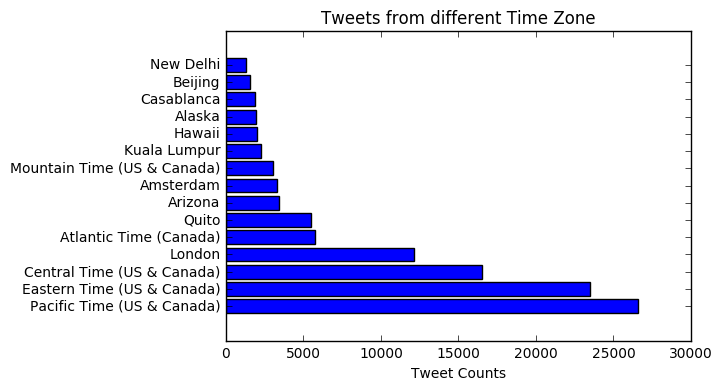

In [100]:
# let's make some chart
import matplotlib.pyplot as plt
import numpy as np
x = [n[0] for n in sorted_a[:15]]
y = [n[1] for n in sorted_a[:15]]


location = [n[0] for n in sorted_a[:15]]
y_pos = np.arange(len(location))
tweets = [n[1] for n in sorted_a[:15]]

plt.barh(y_pos, tweets, align='center')
plt.yticks(y_pos, location)
plt.xlabel('Tweet Counts')
plt.title('Tweets from different Time Zone')
plt.show()

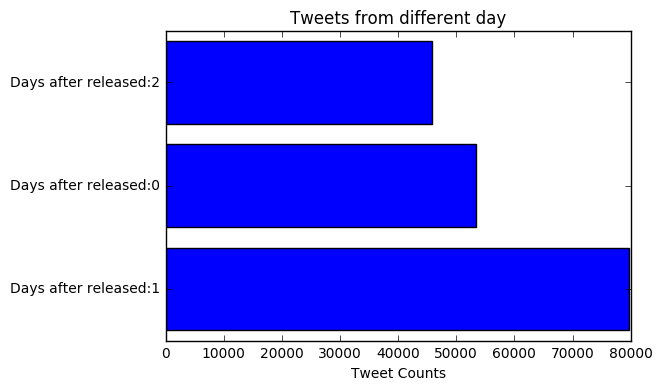

In [243]:
data = pandas.read_csv('CSV/all_original.csv')
temp = data['time'].str.split('+')
for n in range(len(temp)):
    if type(temp[n])==type([]):
        temp[n] = ' '.join(temp[n][0].split(':')[0].split(' ')[2:3])
    else:
        temp[n] = 'NaN'
data['time'] = temp
b = data.groupby(['time']).groups
for n in b:
    b[n] = len(b[n])
sorted_b = sorted(b.items(), key=operator.itemgetter(1))[::-1]

location = ['Days after released:'+str(int(n[0])-13) for n in sorted_b[:3]]
y_pos = np.arange(len(location))
tweets = [n[1] for n in sorted_b[:3]]

plt.barh(y_pos, tweets, align='center')
plt.yticks(y_pos, location)
plt.xlabel('Tweet Counts')
plt.title('Tweets from different day')
plt.show()

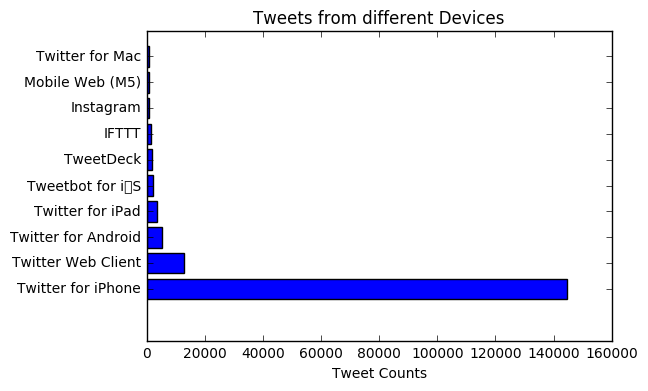

In [102]:
location = [n[0] for n in sorted_c[:10]]
y_pos = np.arange(len(location))
tweets = [n[1] for n in sorted_c[:10]]

plt.barh(y_pos, tweets, align='center')
plt.yticks(y_pos, location)
plt.xlabel('Tweet Counts')
plt.title('Tweets from different Devices')
plt.show()

In [138]:
# some func
# check_emo is using the api from internet to determine the sentiment of the tweet
# sample_size is to determine how many sample we want
# now we pick up some samples
# confidence level 95%
# confidence interval 5
# accodring to the population we get differnet number of sampls
import requests
def check_emo(n,dict):
    r = requests.post('http://sentiment.vivekn.com/api/text/', data = {'txt':n})
    sentiment = r.json()['result']['sentiment']
    dict[sentiment] += 1
    
import math
confidence_level_constant = [50,.67], [68,.99], [90,1.64], [95,1.96], [99,2.57]
def sample_size(population_size, confidence_level=95, confidence_interval=5):
  Z = 0.0
  p = 0.5
  e = confidence_interval/100.0
  N = population_size
  n_0 = 0.0
  n = 0.0
 
  # LOOP THROUGH SUPPORTED CONFIDENCE LEVELS AND FIND THE NUM STD
  # DEVIATIONS FOR THAT CONFIDENCE LEVEL
  for i in confidence_level_constant:
    if i[0] == confidence_level:
      Z = i[1]
 
  if Z == 0.0:
    return -1
 
  # CALC SAMPLE SIZE
  n_0 = ((Z**2) * p * (1-p)) / (e**2)
 
  # ADJUST SAMPLE SIZE FOR FINITE POPULATION
  n = n_0 / (1 + ((n_0 - 1) / float(N)) )
 
  return int(math.ceil(n)) # THE SAMPLE SIZE


In [140]:
# top 5 timezone's emotion
import random
data = pandas.read_csv('CSV/all_original.csv')
a = data.groupby(['time_zone']).groups
sample_a = {}
for n in sorted_a[:5]:
    sample_a[n[0]] = random.sample(a[n[0]],sample_size(n[1]))

for n in sample_a:
    sentiment = {'Positive':0,'Neutral':0,'Negative':0}
    for index in sample_a[n]:
        check_emo(data.loc[index]['text'],sentiment)
    print (sentiment)
    sample_a[n] = sentiment
print (sample_a)

{'Negative': 168, 'Positive': 72, 'Neutral': 139}
{'Negative': 188, 'Positive': 64, 'Neutral': 121}
{'Negative': 182, 'Positive': 59, 'Neutral': 135}
{'Negative': 189, 'Positive': 44, 'Neutral': 128}
{'Negative': 191, 'Positive': 59, 'Neutral': 128}
{'Pacific Time (US & Canada)': {'Negative': 168, 'Positive': 72, 'Neutral': 139}, 'London': {'Negative': 188, 'Positive': 64, 'Neutral': 121}, 'Central Time (US & Canada)': {'Negative': 182, 'Positive': 59, 'Neutral': 135}, 'Atlantic Time (Canada)': {'Negative': 189, 'Positive': 44, 'Neutral': 128}, 'Eastern Time (US & Canada)': {'Negative': 191, 'Positive': 59, 'Neutral': 128}}


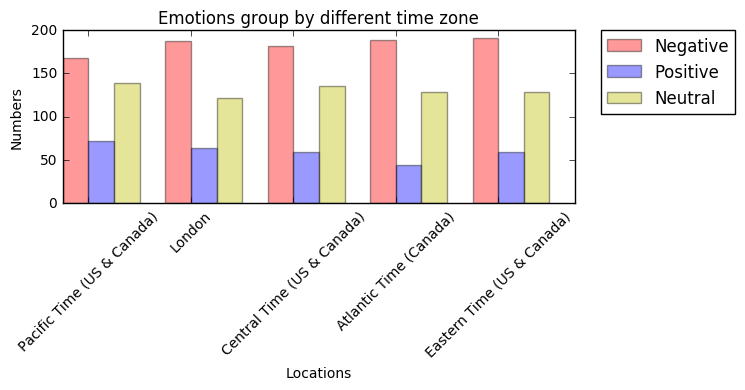

In [237]:
names = [n for n in sample_a]
negative = [sample_a[n]['Negative'] for n in sample_a]
positive = [sample_a[n]['Positive'] for n in sample_a]
neutral = [sample_a[n]['Neutral'] for n in sample_a]
n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 1

opacity = 0.4

rects1 = plt.bar(index*4, negative, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Negative')

rects2 = plt.bar(index*4 + bar_width, positive, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Positive')

rects2 = plt.bar(index*4 + bar_width*2, neutral, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Neutral')

plt.xlabel('Locations')
plt.ylabel('Numbers')
plt.title('Emotions group by different time zone')
plt.xticks(index*4 + bar_width, names,rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [247]:
# top 5 time's emotion
data = pandas.read_csv('CSV/all_original.csv')
temp = data['time'].str.split('+')
for n in range(len(temp)):
    if type(temp[n])==type([]):
        temp[n] = ' '.join(temp[n][0].split(':')[0].split(' ')[2:3])
    else:
        temp[n] = 'NaN'
data['time'] = temp
b = data.groupby(['time']).groups
sample_b = {}

for n in sorted_b[:3]:
    sample_b[n[0]] = random.sample(b[n[0]],sample_size(n[1]))
for n in sample_b:
    sentiment = {'Positive':0,'Neutral':0,'Negative':0}
    for index in sample_b[n]:
        check_emo(data.loc[index]['text'],sentiment)
    print (sentiment)
    sample_b[n] = sentiment
print (sample_b)

{'Negative': 171, 'Positive': 59, 'Neutral': 153}
{'Negative': 180, 'Positive': 70, 'Neutral': 131}
{'Negative': 175, 'Positive': 70, 'Neutral': 137}
{'14': {'Negative': 171, 'Positive': 59, 'Neutral': 153}, '15': {'Negative': 180, 'Positive': 70, 'Neutral': 131}, '13': {'Negative': 175, 'Positive': 70, 'Neutral': 137}}


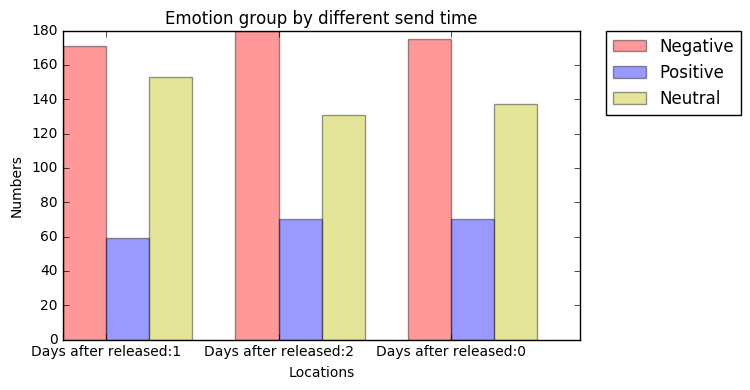

In [253]:
names = ['Days after released:'+str(int(n)-13) for n in sample_b]
negative = [sample_b[n]['Negative'] for n in sample_b]
positive = [sample_b[n]['Positive'] for n in sample_b]
neutral = [sample_b[n]['Neutral'] for n in sample_b]
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 1

opacity = 0.4

rects1 = plt.bar(index*4, negative, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Negative')

rects2 = plt.bar(index*4 + bar_width, positive, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Positive')

rects2 = plt.bar(index*4 + bar_width*2, neutral, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Neutral')

plt.xlabel('Locations')
plt.ylabel('Numbers')
plt.title('Emotion group by different send time')
plt.xticks(index*4 + bar_width, names)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [161]:
# top 5 source's emotion
data = pandas.read_csv('CSV/all_original.csv')
c = data.groupby(['source']).groups
sample_c = {}
for n in sorted_c[:5]:
    sample_c[n[0]] = random.sample(c[n[0]],sample_size(n[1]))

for n in sample_c:
    sentiment = {'Positive':0,'Neutral':0,'Negative':0}
    for index in sample_c[n]:
        check_emo(data.loc[index]['text'],sentiment)
    print (sentiment)
    sample_c[n] = sentiment
print (sample_c)

{'Negative': 131, 'Positive': 93, 'Neutral': 100}
{'Negative': 180, 'Positive': 69, 'Neutral': 124}
{'Negative': 167, 'Positive': 62, 'Neutral': 118}
{'Negative': 191, 'Positive': 78, 'Neutral': 115}
{'Negative': 139, 'Positive': 55, 'Neutral': 164}
{'Tweetbot for iΟS': {'Negative': 131, 'Positive': 93, 'Neutral': 100}, 'Twitter Web Client': {'Negative': 180, 'Positive': 69, 'Neutral': 124}, 'Twitter for iPad': {'Negative': 167, 'Positive': 62, 'Neutral': 118}, 'Twitter for iPhone': {'Negative': 191, 'Positive': 78, 'Neutral': 115}, 'Twitter for Android': {'Negative': 139, 'Positive': 55, 'Neutral': 164}}


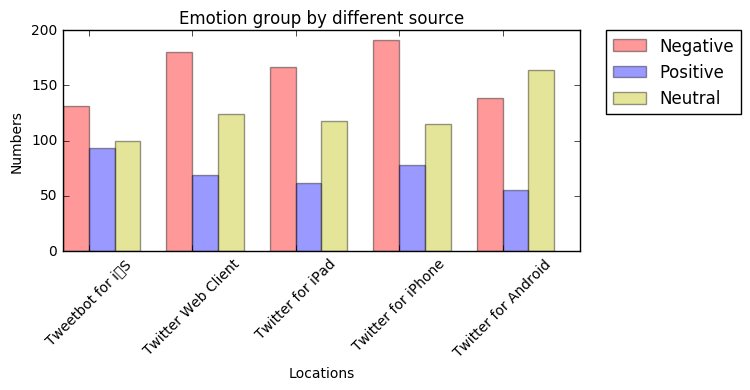

In [238]:
names = [n for n in sample_c]
negative = [sample_c[n]['Negative'] for n in sample_c]
positive = [sample_c[n]['Positive'] for n in sample_c]
neutral = [sample_c[n]['Neutral'] for n in sample_c]
n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 1

opacity = 0.4

rects1 = plt.bar(index*4, negative, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Negative')

rects2 = plt.bar(index*4 + bar_width, positive, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Positive')

rects2 = plt.bar(index*4 + bar_width*2, neutral, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Neutral')

plt.xlabel('Locations')
plt.ylabel('Numbers')
plt.title('Emotion group by different source')
plt.xticks(index*4 + bar_width, names,rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [6]:
# music app, emoji, the way to unlock is the biggest changes in the iOS10
# let's find what people think about this
# first lets find out how many tweets related
import pandas
import json
import requests
data = pandas.read_csv('CSV/all_original.csv')
text = data['text']
music = []
emoji = []
unlock = []
ui = []
for n in text:
    if type(n) == type('asd'):
        if 'music' in n:
            music.append(n)
        elif 'emoji' in n:
            emoji.append(n)
        elif 'unlock' in n:
            unlock.append(n)
        elif 'ui' in n:
            ui.append(n)
print ('music:',len(music),'emoji:',len(emoji),'unlock:',len(unlock),'ui:',len(ui))

music: 2207 emoji: 16550 unlock: 3840 ui: 2532


In [8]:
# people's reaction to the music
music_sentiment = {'Positive':0,'Neutral':0,'Negative':0,'index':0}
try:
    with open('sentiment/music.json') as data_file:    
        music_sentiment = json.load(data_file)
        music = music[music_sentiment['index']:]
except:
    pass
try:
    for n in music:
        r = requests.post('http://sentiment.vivekn.com/api/text/', data = {'txt':n})
        sentiment = r.json()['result']['sentiment']
        music_sentiment[sentiment] += 1
except:
    file = open('sentiment/music.json','w')
    music_sentiment['index'] = music.index(n)
    data = json.dumps(music_sentiment)
    file.write(data)
    file.close
file = open('sentiment/music.json','w')
data = json.dumps(music_sentiment,indent=1)
file.write(data)
file.close
print (music_sentiment)

{'Neutral': 448, 'Positive': 475, 'Negative': 1284, 'index': 0}


In [22]:
# people's reaction to the emoji
emoji_sentiment = {'Positive':0,'Neutral':0,'Negative':0,'index':0}
try:
    with open('sentiment/emoji.json') as data_file:    
        emoji_sentiment = json.load(data_file)
        temp = emoji[emoji_sentiment['index']:]
    try:
        for n in temp:
            r = requests.post('http://sentiment.vivekn.com/api/text/', data = {'txt':n})
            sentiment = r.json()['result']['sentiment']
            emoji_sentiment[sentiment] += 1
    except:
        file = open('sentiment/emoji.json','w')
        emoji_sentiment['index'] = emoji.index(n)
        data = json.dumps(emoji_sentiment,indent=1)
        file.write(data)
        file.close    
except:
    pass
    try:
        for n in emoji:
            r = requests.post('http://sentiment.vivekn.com/api/text/', data = {'txt':n})
            sentiment = r.json()['result']['sentiment']
            emoji_sentiment[sentiment] += 1
    except:
        file = open('sentiment/emoji.json','w')
        emoji_sentiment['index'] = emoji.index(n)
        data = json.dumps(emoji_sentiment,indent=1)
        file.write(data)
        file.close
file = open('sentiment/emoji.json','w')
data = json.dumps(emoji_sentiment,indent=1)
file.write(data)
file.close
print (emoji_sentiment)

{'Neutral': 4168, 'Positive': 2044, 'Negative': 10338, 'index': 8718}


In [18]:
# people's reaction to the unlock
unlock_sentiment = {'Positive':0,'Neutral':0,'Negative':0}
for n in unlock:
    r = requests.post('http://sentiment.vivekn.com/api/text/', data = {'txt':n})
    sentiment = r.json()['result']['sentiment']
    unlock_sentiment[sentiment] += 1
print (unlock_sentiment)

{'Neutral': 968, 'Positive': 482, 'Negative': 2390}


In [19]:
# people's reaction to the ui
ui_sentiment = {'Positive':0,'Neutral':0,'Negative':0}
for n in ui:
    r = requests.post('http://sentiment.vivekn.com/api/text/', data = {'txt':n})
    sentiment = r.json()['result']['sentiment']
    ui_sentiment[sentiment] += 1
print (ui_sentiment)

{'Neutral': 802, 'Positive': 544, 'Negative': 1186}


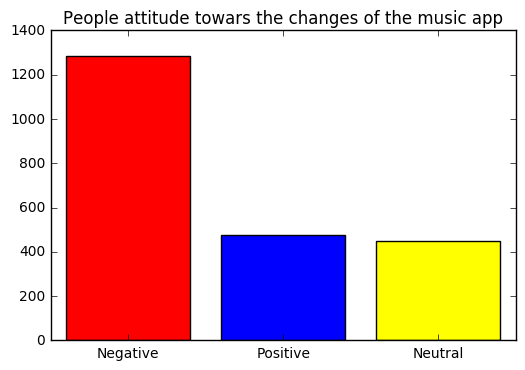

In [84]:
# plot what people thought on those changes
music_sentiment = {'Neutral': 448, 'Positive': 475, 'Negative': 1284}
plt.bar(range(len(music_sentiment)), music_sentiment.values(), align='center',color=['red', 'blue','yellow'])
plt.xticks(range(len(music_sentiment)), music_sentiment.keys())
plt.title('People attitude towars the changes of the music app')
plt.show()

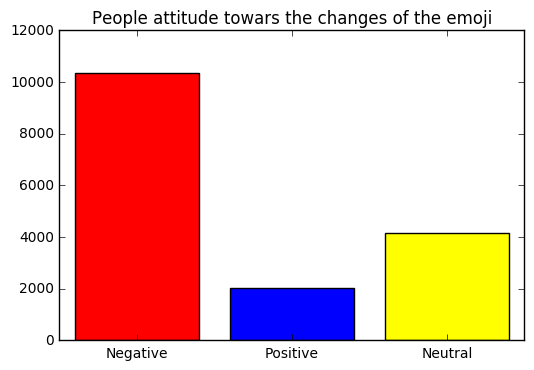

In [85]:
sentiment = {'Neutral': 4168, 'Positive': 2044, 'Negative': 10338}
plt.bar(range(len(sentiment)), sentiment.values(), align='center',color=['red', 'blue','yellow'])
plt.xticks(range(len(sentiment)), sentiment.keys())
plt.title('People attitude towars the changes of the emoji')
plt.show()

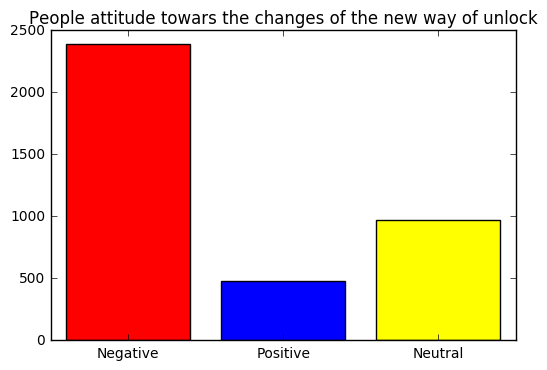

In [86]:
sentiment = {'Neutral': 968, 'Positive': 482, 'Negative': 2390}
plt.bar(range(len(sentiment)), sentiment.values(), align='center',color=['red', 'blue','yellow'])
plt.xticks(range(len(sentiment)), sentiment.keys())
plt.title('People attitude towars the changes of the new way of unlock')
plt.show()

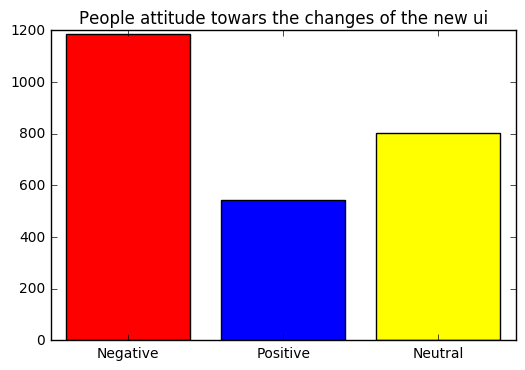

In [87]:
sentiment = {'Neutral': 802, 'Positive': 544, 'Negative': 1186}
plt.bar(range(len(sentiment)), sentiment.values(), align='center',color=['red', 'blue','yellow'])
plt.xticks(range(len(sentiment)), sentiment.keys())
plt.title('People attitude towars the changes of the new ui')
plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Wen Liu (wliu3@wpi.edu).
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

